The original data set is here - http://www.ats.ucla.edu/

This exercise is being done using Google Collab

In [1]:
# Get the data file from Github location
!git clone https://github.com/MonideepDe/Keras_UCLA_Admissions.git

Cloning into 'Keras_UCLA_Admissions'...
remote: Counting objects: 10, done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [0]:
!cp Keras_UCLA_Admissions/student_data.csv .

In [3]:
!ls -lrt

total 16
drwxr-xr-x 2 root root 4096 Aug 24 16:46 sample_data
drwxr-xr-x 3 root root 4096 Aug 27 22:53 Keras_UCLA_Admissions
-rw-r--r-- 1 root root 5088 Aug 27 22:53 student_data.csv


In [0]:
!rm -rf Keras_UCLA_Admissions/

In [0]:
import pandas as pd
import numpy as np

In [8]:
data=pd.read_csv('student_data.csv')
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


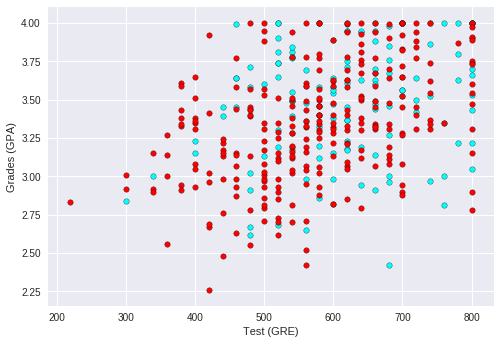

In [14]:
# Plot Data
import matplotlib.pyplot as plt

def plot_pts(data):
  X = np.array(data[["gre", "gpa"]])
  y = np.array(data["admit"])
  admitted = X[np.argwhere(y==1)]
  rejected = X[np.argwhere(y==0)]
  plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s=30, color='cyan', edgecolor='k')
  plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s=30, color='red', edgecolor='k')
  plt.xlabel('Test (GRE)')
  plt.ylabel('Grades (GPA)')

#Plot the points
plot_pts(data)
plt.show()

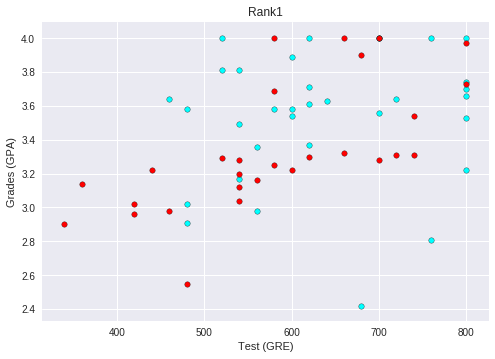

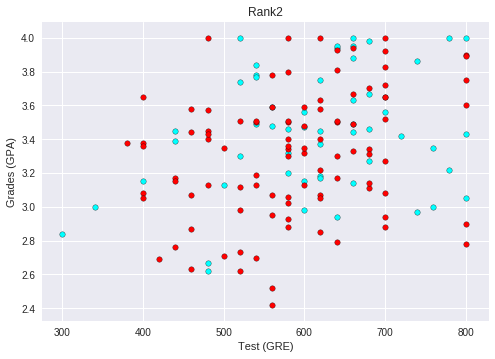

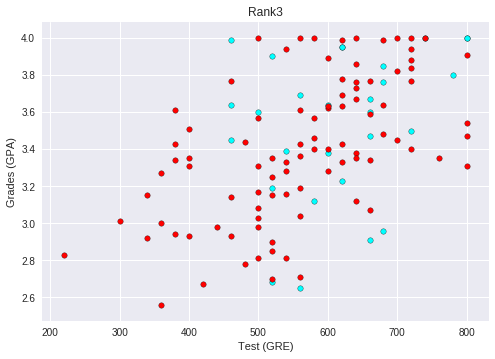

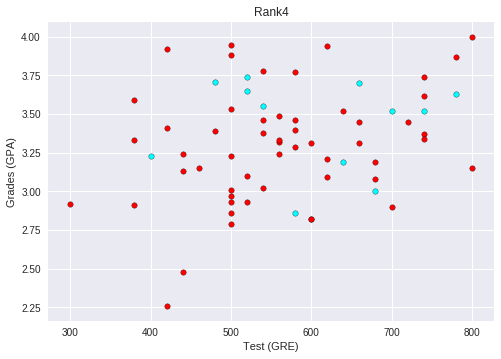

In [15]:
data_rank1 = data[data['rank']==1]
data_rank2 = data[data['rank']==2]
data_rank3 = data[data['rank']==3]
data_rank4 = data[data['rank']==4]

plot_pts(data_rank1)
plt.title("Rank1")
plt.show()

plot_pts(data_rank2)
plt.title("Rank2")
plt.show()

plot_pts(data_rank3)
plt.title("Rank3")
plt.show()

plot_pts(data_rank4)
plt.title("Rank4")
plt.show()

Alright! Looks like lower ranks have higher acceptance.

In [16]:
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)
one_hot_data = one_hot_data.drop('rank', axis=1)
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [17]:
# Scale in
processed_data = one_hot_data[:]
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


In [25]:
# Train and Test Sample Splits

train_sample_index = np.random.choice(processed_data.index, size = int(len(processed_data) * 0.9), replace=False)
train_data, test_data = processed_data.iloc[train_sample_index], processed_data.drop(train_sample_index)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
7        0  0.500  0.7700       0       1       0       0
141      1  0.875  0.8800       0       0       0       1
235      0  0.775  0.7625       0       1       0       0
262      1  0.650  0.7975       0       0       1       0
12       1  0.950  1.0000       1       0       0       0
101      0  0.725  0.8925       0       0       1       0
138      0  0.775  0.8500       0       1       0       0
241      1  0.650  0.9525       1       0       0       0
238      0  0.625  0.7150       0       0       0       1
78       0  0.675  0.7800       1       0       0       0
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
31       0  0.950  0.8375       0       0       1       0
53       1  0.850  0.8175       0       1       0       0
55       1  0.925  1.0000       0       0       1       0
61       0  0.700  0.8300       0       0       0       1
79    

In [28]:
# Format data in features and targets, for both test and train data set
import keras

# Turning data into numpy arrays so as to facilitate training with keras

features = np.array(train_data.drop('admit', axis=1))
targets = np.array(keras.utils.to_categorical(train_data['admit']))
features_test = np.array(test_data.drop('admit', axis=1))
targets_test = np.array(keras.utils.to_categorical(test_data['admit']))

print(features[:10])
print(targets[:10])

[[0.5    0.77   0.     1.     0.     0.    ]
 [0.875  0.88   0.     0.     0.     1.    ]
 [0.775  0.7625 0.     1.     0.     0.    ]
 [0.65   0.7975 0.     0.     1.     0.    ]
 [0.95   1.     1.     0.     0.     0.    ]
 [0.725  0.8925 0.     0.     1.     0.    ]
 [0.775  0.85   0.     1.     0.     0.    ]
 [0.65   0.9525 1.     0.     0.     0.    ]
 [0.625  0.715  0.     0.     0.     1.    ]
 [0.675  0.78   1.     0.     0.     0.    ]]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [38]:
# Define the neural net
from keras.models import Sequential
from keras.layers.core import Activation, Dense, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils

nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(6,)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(.1))
nn_model.add(Dense(2, activation='softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Train the beast
nn_model.fit(features, targets, epochs=200, batch_size=100, verbose=0)

In [40]:
# Lets checkout how the model did
def check_score(model):
  score = model.evaluate(features, targets)
  print("Training Accuracy:", score[1])
  score = model.evaluate(features_test, targets_test)
  print("Test Accuracy:", score[1])

check_score(nn_model)

360/360 [==============================] - 0s 245us/step
Training Accuracy: 0.7194444444444444
40/40 [==============================] - 0s 245us/step
Test Accuracy: 0.625


In [41]:
nn_model.fit(features, targets, epochs=1000, batch_size=100, verbose=0)
check_score(nn_model)

360/360 [==============================] - 0s 76us/step
Training Accuracy: 0.7583333333333333
40/40 [==============================] - 0s 247us/step
Test Accuracy: 0.6


In [43]:
# Lets checkout other activation function
nn_sig_model = Sequential()
nn_sig_model.add(Dense(128, activation='sigmoid', input_shape=(6,)))
nn_sig_model.add(Dropout(0.2))
nn_sig_model.add(Dense(64, activation='sigmoid'))
nn_sig_model.add(Dropout(.1))
nn_sig_model.add(Dense(2, activation='softmax'))

nn_sig_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_sig_model.summary()

nn_sig_model.fit(features, targets, epochs=1000, batch_size=100, verbose=0)
check_score(nn_sig_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 130       
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________
360/360 [==============================] - 0s 310us/step
Training Accuracy: 0.7111111111111111
40/40 [==============================] - 0s 2

In [45]:
nn_sig_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
nn_sig_model.summary()

nn_sig_model.fit(features, targets, epochs=5000, batch_size=100, verbose=0)
check_score(nn_sig_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 130       
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________
360/360 [==============================] - 0s 363us/step
Training Accuracy: 0.7166666666666667
40/40 [==============================] - 0s 3

In [0]:
nn_model.fit(features, targets, epochs=5000, batch_size=100, verbose=0)
check_score(nn_model)